In [2]:
from pathlib import Path
import os
downloads_dir = Path.home() / "Downloads/ISYE 6414 Project"
os.chdir(downloads_dir)
print(f"Current working directory ➜ {Path.cwd()}")

#My project data was stored in a folder named ISYE 6414 Project, but for anyone running this, 
# just take out ISYE 6414 Project from the directory

Current working directory ➜ /Users/navrajgrewal/Downloads/ISYE 6414 Project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
csv_files = [
    'GS2.csv',          # 2-yr Treasury
    'GS10.csv',         # 10-yr Treasury
    'FEDFUNDS.csv',     # Fed funds rate
    'CPIAUCSL.csv',     # CPI
    'UNRATE.csv',       # Unemployment
    'INDPRO.csv',       # Industrial production
    'MORTGAGE30US.csv', # 30-yr mortgage (weekly)
    'WM2NS.csv',        # M2 money supply (weekly)
    'DCOILWTICO.csv',    # WTI crude oil (daily)
    'NFCI.csv',          # Financial Conditions Index (weekly)
    'UMCSENT.csv',       # Consumer Sentiment (monthly)
    'USALOLITONOSTSAM.csv'  # Alternative Leading Index (CLI) (monthly)
]

high_freq = {'MORTGAGE30US.csv', 'WM2NS.csv', 'DCOILWTICO.csv', 'NFCI.csv'}


macro = None
for fname in csv_files:
    df = pd.read_csv(fname)

    
    if 'observation_date' not in df.columns:
        df = df.rename(columns={df.columns[0]: 'observation_date'})

  
    df['observation_date'] = pd.to_datetime(df['observation_date'])
    df = df.set_index('observation_date').sort_index()


    df = df.resample('M').last() if fname in high_freq else df.resample('M').last()

  
    macro = df if macro is None else macro.join(df, how='outer')


print(macro.head(10))
print(macro.shape)


                   GS2  GS10  FEDFUNDS  CPIAUCSL  UNRATE   INDPRO  \
observation_date                                                    
2000-01-31        6.44  6.66      5.45     169.3     4.0  91.4092   
2000-02-29        6.61  6.52      5.73     170.0     4.1  91.7245   
2000-03-31        6.53  6.26      5.85     171.0     4.0  92.0830   
2000-04-30        6.40  5.99      6.02     170.9     3.8  92.6659   
2000-05-31        6.81  6.44      6.27     171.2     4.0  92.9347   
2000-06-30        6.48  6.10      6.53     172.2     4.0  93.0018   
2000-07-31        6.34  6.05      6.54     172.7     4.0  92.8373   
2000-08-31        6.23  5.83      6.50     172.7     4.1  92.5910   
2000-09-30        6.08  5.80      6.52     173.6     3.9  92.9827   
2000-10-31        5.91  5.74      6.51     173.9     3.9  92.6400   

                  MORTGAGE30US   WM2NS  DCOILWTICO     NFCI  UMCSENT  \
observation_date                                                       
2000-01-31                8

/var/folders/lp/b4yywzq93rzgbt7vv1_22hnw0000gn/T/ipykernel_2516/981278896.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last() if fname in high_freq else df.resample('M').last()
/var/folders/lp/b4yywzq93rzgbt7vv1_22hnw0000gn/T/ipykernel_2516/981278896.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last() if fname in high_freq else df.resample('M').last()
/var/folders/lp/b4yywzq93rzgbt7vv1_22hnw0000gn/T/ipykernel_2516/981278896.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last() if fname in high_freq else df.resample('M').last()
/var/folders/lp/b4yywzq93rzgbt7vv1_22hnw0000gn/T/ipykernel_2516/981278896.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last() if 

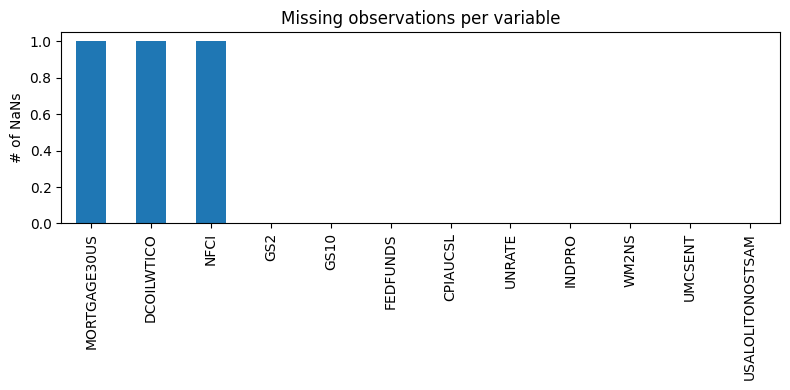

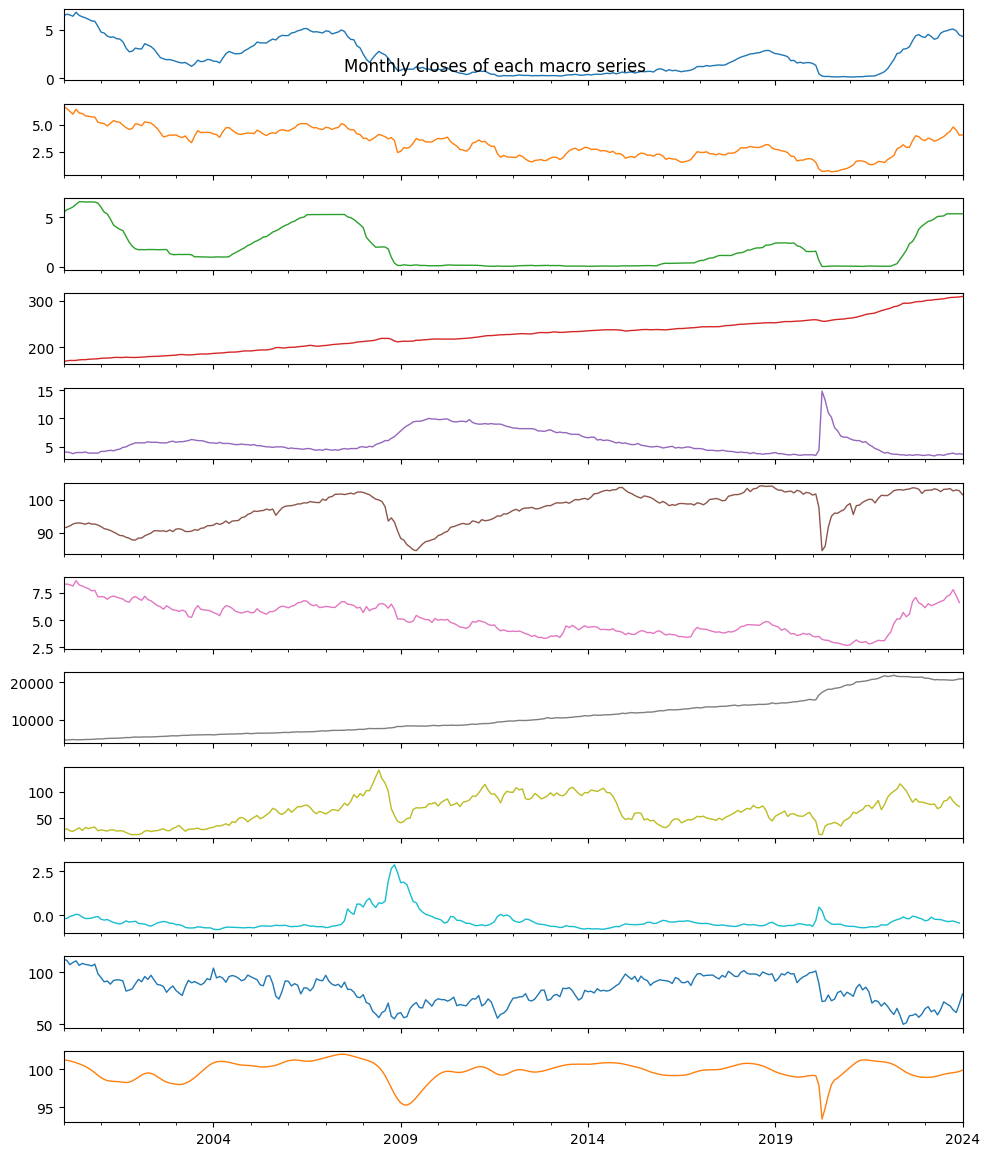

In [4]:
macro.isna().sum().sort_values(ascending=False).plot.bar(figsize=(8,4))
plt.title('Missing observations per variable')
plt.ylabel('# of NaNs'); plt.tight_layout()


ax = macro.plot(subplots=True, figsize=(10,12), legend=False, linewidth=1)
for a in ax:
    a.set_ylabel('')
    a.set_xlabel('')
plt.suptitle('Monthly closes of each macro series', y=0.92)
plt.tight_layout()

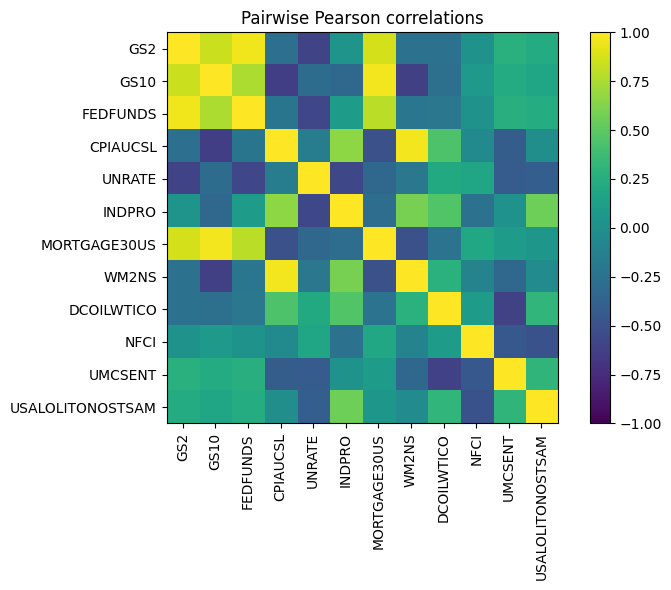

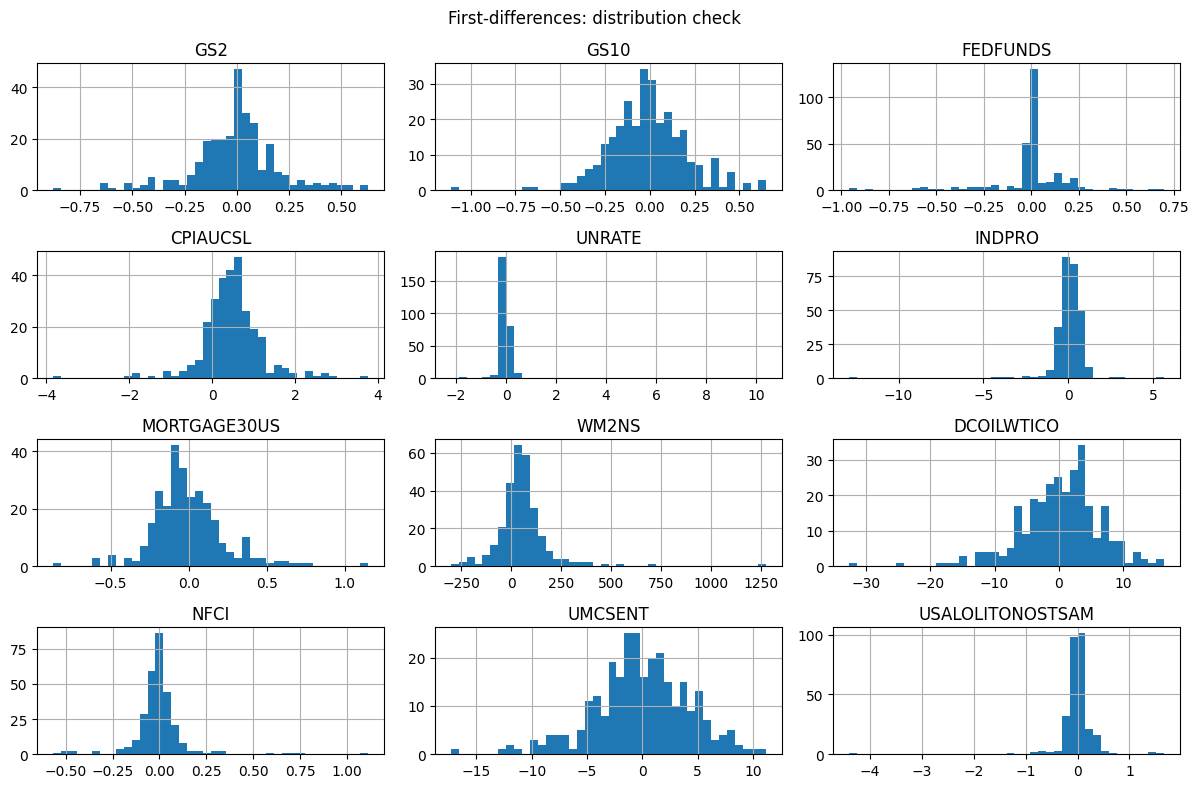

In [5]:
import numpy as np
corr = macro.corr()

fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title('Pairwise Pearson correlations'); plt.tight_layout()

macro.diff().dropna().hist(bins=40, figsize=(12,8))
plt.suptitle('First-differences: distribution check'); plt.tight_layout()

In [6]:
macro_pct = macro.copy()
macro_pct[:] = macro_pct.pct_change()
macro_pct['NFCI_lag1'] = macro_pct['NFCI'].shift(1)
macro_pct = macro_pct.iloc[2:-1]

print("Any NaNs left?\n", macro_pct.isna().sum())
print(macro_pct.head())
print(macro_pct.tail())

Any NaNs left?
 GS2                 0
GS10                0
FEDFUNDS            0
CPIAUCSL            0
UNRATE              0
INDPRO              0
MORTGAGE30US        0
WM2NS               0
DCOILWTICO          0
NFCI                0
UMCSENT             0
USALOLITONOSTSAM    0
NFCI_lag1           0
dtype: int64
                       GS2      GS10  FEDFUNDS  CPIAUCSL    UNRATE    INDPRO  \
observation_date                                                               
2000-03-31       -0.012103 -0.039877  0.020942  0.005882 -0.024390  0.003908   
2000-04-30       -0.019908 -0.043131  0.029060 -0.000585 -0.050000  0.006330   
2000-05-31        0.064062  0.075125  0.041528  0.001755  0.052632  0.002901   
2000-06-30       -0.048458 -0.052795  0.041467  0.005841  0.000000  0.000722   
2000-07-31       -0.021605 -0.008197  0.001531  0.002904  0.000000 -0.001769   

                  MORTGAGE30US     WM2NS  DCOILWTICO      NFCI   UMCSENT  \
observation_date                                

/var/folders/lp/b4yywzq93rzgbt7vv1_22hnw0000gn/T/ipykernel_2516/2647996983.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  macro_pct[:] = macro_pct.pct_change()


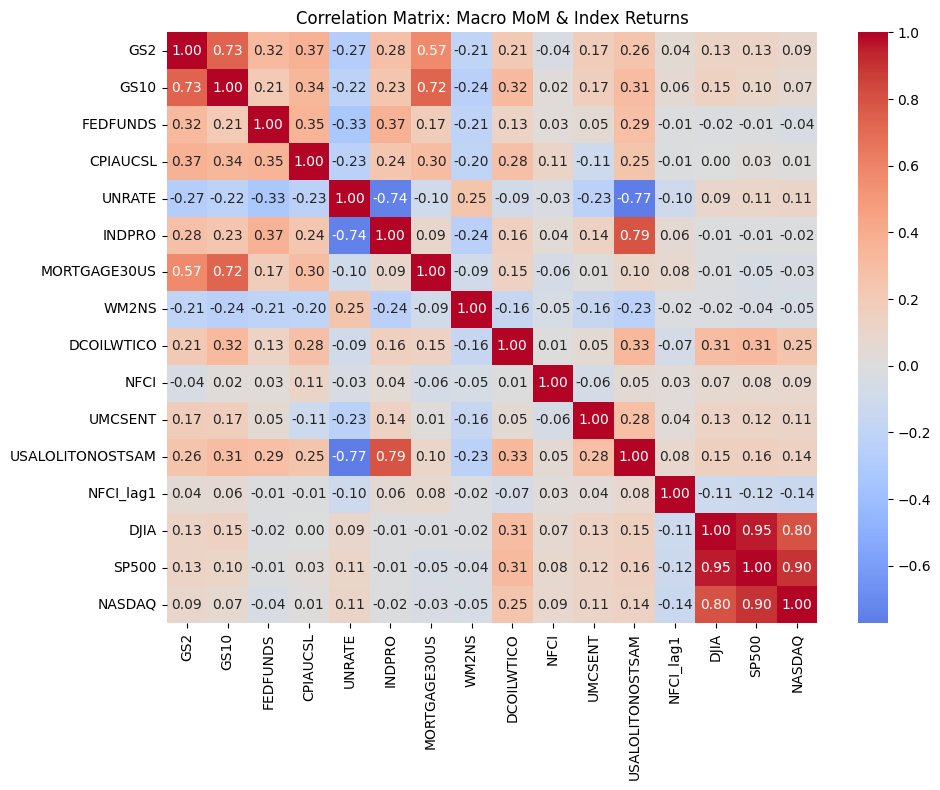

In [7]:
import yfinance as yf
import seaborn as sns
tickers = {'SP500': '^GSPC', 'DJIA': '^DJI', 'NASDAQ': '^IXIC'}
idx = yf.download(list(tickers.values()),
                  start=macro_pct.index.min().strftime('%Y-%m-%d'),
                  end=(macro_pct.index.max() + pd.offsets.MonthEnd(1)).strftime('%Y-%m-%d'),
                  interval='1mo', auto_adjust=True, progress=False)['Close']
idx = idx.rename(columns={v: k for k, v in tickers.items()})
idx.index = idx.index.to_period('M').to_timestamp('M')

idx_pct = idx.pct_change().iloc[1:]
idx_pct = idx_pct.reindex(macro_pct.index)


combined = pd.concat([macro_pct, idx_pct], axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(combined.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix: Macro MoM & Index Returns")
plt.tight_layout()
plt.show()




In [8]:
import statsmodels.api as sm

combined = pd.concat([macro_pct, idx_pct], axis=1).dropna()

corr_with_sp = combined.corr()['SP500'].loc[macro_pct.columns]
top5 = corr_with_sp.abs().sort_values(ascending=False).head(5).index.tolist()
print("Top 5 macro MoM predictors of SP500_ret:", top5)

print(combined[top5].describe().loc[['min','max']])

Top 5 macro MoM predictors of SP500_ret: ['DCOILWTICO', 'USALOLITONOSTSAM', 'GS2', 'UMCSENT', 'NFCI_lag1']
     DCOILWTICO  USALOLITONOSTSAM       GS2   UMCSENT  NFCI_lag1
min   -0.542494         -0.045048 -0.661654 -0.194164  -7.831302
max    0.849714          0.017595  0.625000  0.137031  11.883773


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
X = combined[top5]
y = combined['SP500']
X = sm.add_constant(X)
ols = sm.OLS(y, X).fit()
print(ols.summary())

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIFs for SP500 Model:")
print(vif_data)
print("\nShapiro-Wilk Test for Residual Normality (SP500):", stats.shapiro(ols.resid))

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.917
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           5.45e-07
Time:                        01:08:46   Log-Likelihood:                 500.96
No. Observations:                 284   AIC:                            -989.9
Df Residuals:                     278   BIC:                            -968.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0040      0.003  

In [10]:
for idx_col in ['DJIA', 'NASDAQ']:
    print(f"\n=== OLS for {idx_col} MoM return ===")
    corr_with_idx = combined.corr()[idx_col].loc[macro_pct.columns]
    top5 = corr_with_idx.abs().sort_values(ascending=False).head(5).index.tolist()
    print("Top 5 predictors:", top5)
    X = combined[top5]
    y = combined[idx_col]
    X = sm.add_constant(X)
    ols = sm.OLS(y, X).fit()
    print(ols.summary())
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIFs for {idx_col} Model:")
    print(vif_data)
    print(f"\nShapiro-Wilk Test for Residual Normality ({idx_col}):", stats.shapiro(ols.resid))


=== OLS for DJIA MoM return ===
Top 5 predictors: ['DCOILWTICO', 'USALOLITONOSTSAM', 'GS10', 'UMCSENT', 'GS2']
                            OLS Regression Results                            
Dep. Variable:                   DJIA   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     6.809
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           5.22e-06
Time:                        01:08:48   Log-Likelihood:                 506.72
No. Observations:                 284   AIC:                            -1001.
Df Residuals:                     278   BIC:                            -979.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------

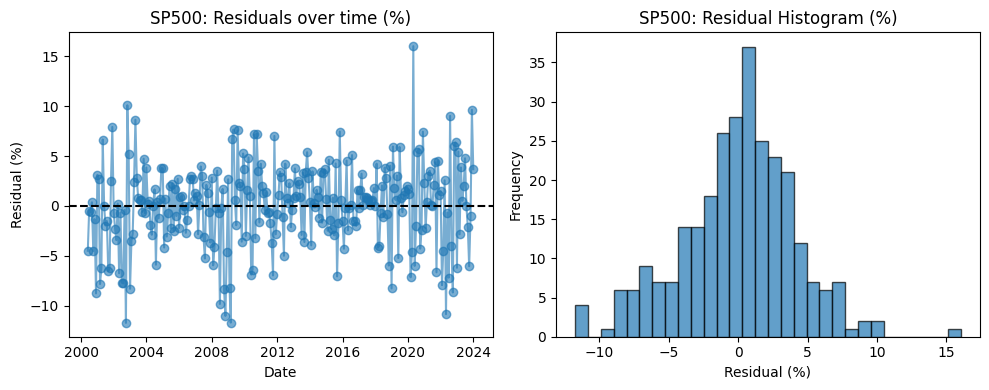

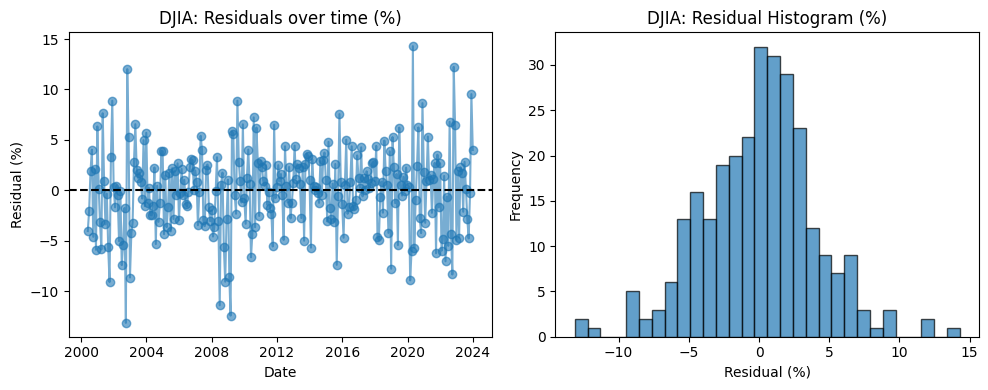

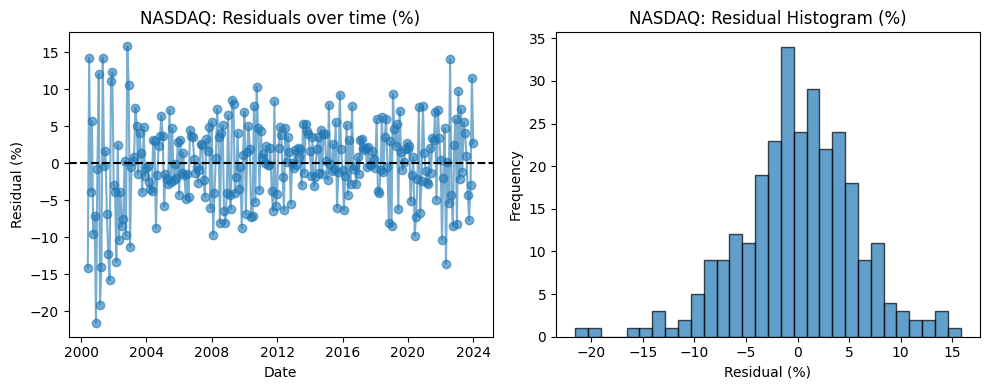

In [11]:
models = {}
for idx_col in ['SP500','DJIA','NASDAQ']:
    corr = combined.corr()[idx_col].loc[macro_pct.columns]
    top5 = corr.abs().sort_values(ascending=False).head(5).index.tolist()
    X = sm.add_constant(combined[top5])
    y = combined[idx_col]
    models[idx_col] = sm.OLS(y, X).fit()


for name, model in models.items():
    resid = model.resid * 100

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].plot(resid.index, resid, marker='o', linestyle='-', alpha=0.6)
    axes[0].axhline(0, color='k', ls='--')
    axes[0].set_title(f'{name}: Residuals over time (%)')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Residual (%)')
    
    axes[1].hist(resid, bins=30, edgecolor='k', alpha=0.7)
    axes[1].set_title(f'{name}: Residual Histogram (%)')
    axes[1].set_xlabel('Residual (%)')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [12]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


X = combined[['DCOILWTICO', 'USALOLITONOSTSAM', 'GS2', 'UMCSENT', 'NFCI_lag1']]
y = combined['SP500']


lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
lasso.fit(X, y)


coefs = pd.Series(lasso.named_steps['lassocv'].coef_, index=X.columns)
alpha = lasso.named_steps['lassocv'].alpha_
y_pred = lasso.predict(X)


r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))


print("Lasso Coefficients:\n", coefs)
print("\nBest Alpha (Lambda):", alpha)
print("\nLasso R2:", r2)
print("Lasso MAE:", mae)
print("Lasso RMSE:", rmse)

Lasso Coefficients:
 DCOILWTICO          0.005392
USALOLITONOSTSAM    0.000000
GS2                 0.000000
UMCSENT             0.000000
NFCI_lag1          -0.000000
dtype: float64

Best Alpha (Lambda): 0.008562531392737072

Lasso R2: 0.0618147073015447
Lasso MAE: 0.03257955301562341
Lasso RMSE: 0.04292815813207677


In [13]:
from sklearn.linear_model import ElasticNetCV

X = combined[['GS2', 'GS10', 'FEDFUNDS', 'UMCSENT', 'UNRATE', 'USALOLITONOSTSAM', 
             'INDPRO', 'MORTGAGE30US', 'NFCI', 'NFCI_lag1', 'WM2NS', 'CPIAUCSL', 
             'DCOILWTICO']]
y = combined['SP500']

elastic_net = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, random_state=42, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
)
elastic_net.fit(X, y)

coefs = pd.Series(elastic_net.named_steps['elasticnetcv'].coef_, index=X.columns)
alpha = elastic_net.named_steps['elasticnetcv'].alpha_
l1_ratio = elastic_net.named_steps['elasticnetcv'].l1_ratio_
y_pred = elastic_net.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Elastic Net Coefficients:\n", coefs)
print("\nBest Alpha (Lambda):", alpha)
print("Best L1 Ratio (Lasso-Ridge mix):", l1_ratio)
print("\nElastic Net R²:", r2)
print("Elastic Net MAE:", mae)
print("Elastic Net RMSE:", rmse)



Elastic Net Coefficients:
 GS2                 0.000000
GS10                0.000000
FEDFUNDS           -0.000000
UMCSENT             0.000000
UNRATE              0.000000
USALOLITONOSTSAM    0.000000
INDPRO             -0.000000
MORTGAGE30US       -0.000000
NFCI                0.000000
NFCI_lag1          -0.000000
WM2NS              -0.000000
CPIAUCSL           -0.000000
DCOILWTICO          0.005006
dtype: float64

Best Alpha (Lambda): 0.08562531392737067
Best L1 Ratio (Lasso-Ridge mix): 0.1

Elastic Net R²: 0.05837527691989208
Elastic Net MAE: 0.03262503262861205
Elastic Net RMSE: 0.0430067744451184


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import numpy as np
X = combined[['DCOILWTICO', 'USALOLITONOSTSAM', 'GS2', 'UMCSENT', 'NFCI_lag1']]
y = combined['SP500']

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)
y_tree_pred = tree.predict(X)
tree_r2 = r2_score(y, y_tree_pred)
tree_mae = mean_absolute_error(y, y_tree_pred)
tree_rmse = np.sqrt(mean_squared_error(y, y_tree_pred))
tree_cv = cross_val_score(tree, X, y, cv=5, scoring='r2')


hgb = HistGradientBoostingRegressor(max_iter=100, max_depth=3, learning_rate=0.1, random_state=42)
hgb.fit(X, y)

y_hgb_pred = hgb.predict(X)

hgb_r2 = r2_score(y, y_hgb_pred)
hgb_mae = mean_absolute_error(y, y_hgb_pred)
hgb_rmse = np.sqrt(mean_squared_error(y, y_hgb_pred))
hgb_cv = cross_val_score(hgb, X, y, cv=5, scoring='r2')

print("\n--- HistGradientBoosting ---")
print(f"Train R²: {hgb_r2:.3f}, MAE: {hgb_mae:.3f}, RMSE: {hgb_rmse:.3f}")
print(f"CV R² Scores: {hgb_cv}")
print(f"Mean CV R²: {hgb_cv.mean():.3f}")

print("\n--- Decision Tree ---")
print(f"Train R²: {tree_r2:.3f}, MAE: {tree_mae:.3f}, RMSE: {tree_rmse:.3f}")
print(f"CV R² Scores: {tree_cv}")
print(f"Mean CV R²: {tree_cv.mean():.3f}")


--- HistGradientBoosting ---
Train R²: 0.581, MAE: 0.022, RMSE: 0.029
CV R² Scores: [-0.29800902  0.07832603  0.05344761 -0.41168058  0.074784  ]
Mean CV R²: -0.101

--- Decision Tree ---
Train R²: 0.369, MAE: 0.028, RMSE: 0.035
CV R² Scores: [-0.207926   -0.10243646  0.05414429 -0.42809299  0.05346866]
Mean CV R²: -0.126


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

y_binary = (combined['SP500'] > 0).astype(int)

X = combined[['DCOILWTICO', 'USALOLITONOSTSAM', 'GS2', 'UMCSENT', 'NFCI_lag1']]

split_date = pd.to_datetime('2018-01-01')
X_train = X.loc[X.index < split_date]
y_train = y_binary.loc[y_binary.index < split_date]
X_test = X.loc[X.index >= split_date]
y_test = y_binary.loc[y_binary.index >= split_date]

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Train size: 212, Test size: 72

--- Logistic Regression ---
Accuracy: 0.6527777777777778
[[ 7 18]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.50      0.28      0.36        25
           1       0.69      0.85      0.76        47

    accuracy                           0.65        72
   macro avg       0.59      0.57      0.56        72
weighted avg       0.62      0.65      0.62        72


--- Random Forest ---
Accuracy: 0.6527777777777778
[[11 14]
 [11 36]]
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        25
           1       0.72      0.77      0.74        47

    accuracy                           0.65        72
   macro avg       0.61      0.60      0.61        72
weighted avg       0.64      0.65      0.65        72



In [16]:
y_binary_djia = (combined['DJIA'] > 0).astype(int)


X = combined[['DCOILWTICO', 'USALOLITONOSTSAM', 'GS2', 'UMCSENT', 'NFCI_lag1']]


split_date = pd.to_datetime('2018-01-01')
X_train = X.loc[X.index < split_date]
y_train = y_binary_djia.loc[y_binary_djia.index < split_date]
X_test = X.loc[X.index >= split_date]
y_test = y_binary_djia.loc[y_binary_djia.index >= split_date]

print(f"Train size (DJIA): {len(X_train)}, Test size (DJIA): {len(X_test)}")


logreg_djia = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg_djia.fit(X_train, y_train)
y_pred_log_djia = logreg_djia.predict(X_test)


rf_djia = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_djia.fit(X_train, y_train)
y_pred_rf_djia = rf_djia.predict(X_test)


print("\n--- Logistic Regression (DJIA) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_djia))
print(confusion_matrix(y_test, y_pred_log_djia))
print(classification_report(y_test, y_pred_log_djia))

print("\n--- Random Forest (DJIA) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_djia))
print(confusion_matrix(y_test, y_pred_rf_djia))
print(classification_report(y_test, y_pred_rf_djia))

Train size (DJIA): 212, Test size (DJIA): 72

--- Logistic Regression (DJIA) ---
Accuracy: 0.5972222222222222
[[ 8 20]
 [ 9 35]]
              precision    recall  f1-score   support

           0       0.47      0.29      0.36        28
           1       0.64      0.80      0.71        44

    accuracy                           0.60        72
   macro avg       0.55      0.54      0.53        72
weighted avg       0.57      0.60      0.57        72


--- Random Forest (DJIA) ---
Accuracy: 0.5555555555555556
[[14 14]
 [18 26]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        28
           1       0.65      0.59      0.62        44

    accuracy                           0.56        72
   macro avg       0.54      0.55      0.54        72
weighted avg       0.57      0.56      0.56        72



In [17]:
y_binary_nasdaq = (combined['NASDAQ'] > 0).astype(int)


X = combined[['DCOILWTICO', 'USALOLITONOSTSAM', 'GS2', 'UMCSENT', 'NFCI_lag1']]


split_date = pd.to_datetime('2018-01-01')
X_train = X.loc[X.index < split_date]
y_train = y_binary_nasdaq.loc[y_binary_nasdaq.index < split_date]
X_test = X.loc[X.index >= split_date]
y_test = y_binary_nasdaq.loc[y_binary_nasdaq.index >= split_date]

print(f"Train size (NASDAQ): {len(X_train)}, Test size (NASDAQ): {len(X_test)}")


logreg_nasdaq = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg_nasdaq.fit(X_train, y_train)
y_pred_log_nasdaq = logreg_nasdaq.predict(X_test)


rf_nasdaq = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_nasdaq.fit(X_train, y_train)
y_pred_rf_nasdaq = rf_nasdaq.predict(X_test)


print("\n--- Logistic Regression (NASDAQ) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_nasdaq))
print(confusion_matrix(y_test, y_pred_log_nasdaq))
print(classification_report(y_test, y_pred_log_nasdaq))

print("\n--- Random Forest (NASDAQ) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_nasdaq))
print(confusion_matrix(y_test, y_pred_rf_nasdaq))
print(classification_report(y_test, y_pred_rf_nasdaq))

Train size (NASDAQ): 212, Test size (NASDAQ): 72

--- Logistic Regression (NASDAQ) ---
Accuracy: 0.5833333333333334
[[10 15]
 [15 32]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        25
           1       0.68      0.68      0.68        47

    accuracy                           0.58        72
   macro avg       0.54      0.54      0.54        72
weighted avg       0.58      0.58      0.58        72


--- Random Forest (NASDAQ) ---
Accuracy: 0.5972222222222222
[[16  9]
 [20 27]]
              precision    recall  f1-score   support

           0       0.44      0.64      0.52        25
           1       0.75      0.57      0.65        47

    accuracy                           0.60        72
   macro avg       0.60      0.61      0.59        72
weighted avg       0.64      0.60      0.61        72



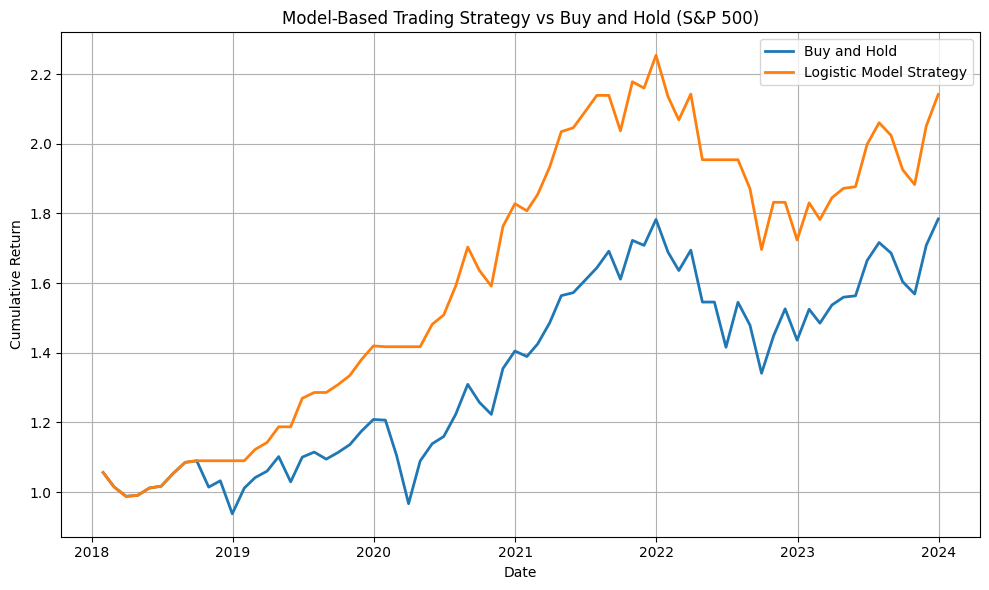


Final Cumulative Return:
Buy and Hold: 1.78x
Logistic Model Strategy: 2.14x

Annualized Return:
Buy and Hold: 10.13%
Logistic Model Strategy: 13.53%


In [18]:
returns_test = idx_pct.loc[X_test.index, 'SP500']
assert len(returns_test) == len(y_test)
buy_and_hold_returns = returns_test.copy()
model_strategy_returns = returns_test.copy()
model_strategy_returns[y_pred_log == 0] = 0 
buy_and_hold_cum = (1 + buy_and_hold_returns).cumprod()
model_cum = (1 + model_strategy_returns).cumprod()

plt.figure(figsize=(10,6))
plt.plot(buy_and_hold_cum, label='Buy and Hold', linewidth=2)
plt.plot(model_cum, label='Logistic Model Strategy', linewidth=2)
plt.title('Model-Based Trading Strategy vs Buy and Hold (S&P 500)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nFinal Cumulative Return:")
print(f"Buy and Hold: {buy_and_hold_cum.iloc[-1]:.2f}x")
print(f"Logistic Model Strategy: {model_cum.iloc[-1]:.2f}x")

print("\nAnnualized Return:")
n_years = (len(buy_and_hold_returns) / 12)
print(f"Buy and Hold: {((buy_and_hold_cum.iloc[-1])**(1/n_years) - 1)*100:.2f}%")
print(f"Logistic Model Strategy: {((model_cum.iloc[-1])**(1/n_years) - 1)*100:.2f}%")

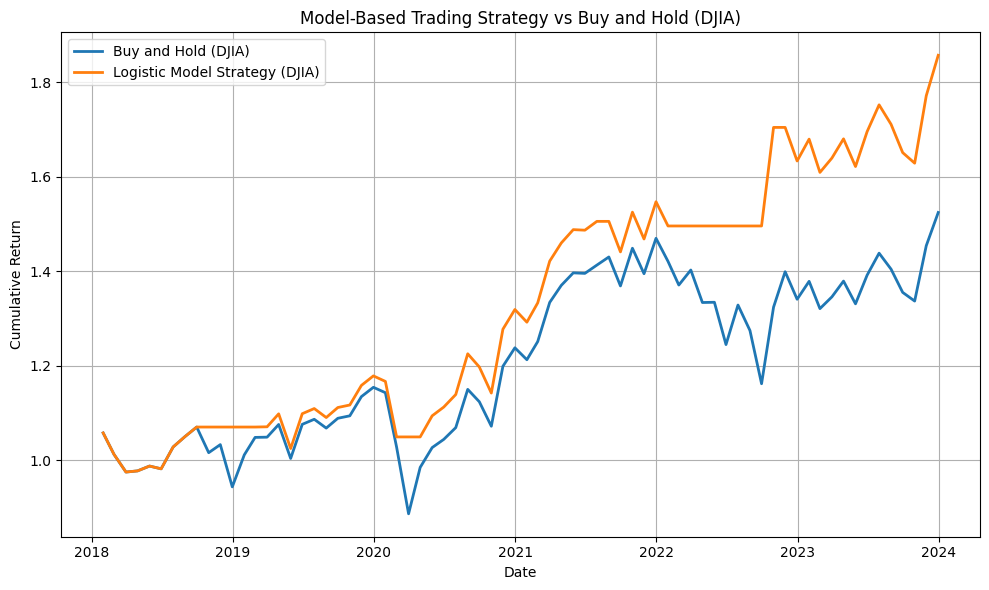


DJIA - Final Cumulative Return:
Buy and Hold: 1.52x
Model Strategy: 1.86x

DJIA - Annualized Return:
Buy and Hold: 7.28%
Model Strategy: 10.87%


In [19]:

returns_test_djia = idx_pct.loc[X_test.index, 'DJIA']

assert len(returns_test_djia) == len(y_test)

buy_and_hold_returns_djia = returns_test_djia.copy()
model_strategy_returns_djia = returns_test_djia.copy()
model_strategy_returns_djia[y_pred_log_djia == 0] = 0
buy_and_hold_cum_djia = (1 + buy_and_hold_returns_djia).cumprod()
model_cum_djia = (1 + model_strategy_returns_djia).cumprod()


plt.figure(figsize=(10,6))
plt.plot(buy_and_hold_cum_djia, label='Buy and Hold (DJIA)', linewidth=2)
plt.plot(model_cum_djia, label='Logistic Model Strategy (DJIA)', linewidth=2)
plt.title('Model-Based Trading Strategy vs Buy and Hold (DJIA)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nDJIA - Final Cumulative Return:")
print(f"Buy and Hold: {buy_and_hold_cum_djia.iloc[-1]:.2f}x")
print(f"Model Strategy: {model_cum_djia.iloc[-1]:.2f}x")

print("\nDJIA - Annualized Return:")
n_years_djia = (len(buy_and_hold_returns_djia) / 12)
print(f"Buy and Hold: {((buy_and_hold_cum_djia.iloc[-1])**(1/n_years_djia) - 1)*100:.2f}%")
print(f"Model Strategy: {((model_cum_djia.iloc[-1])**(1/n_years_djia) - 1)*100:.2f}%")



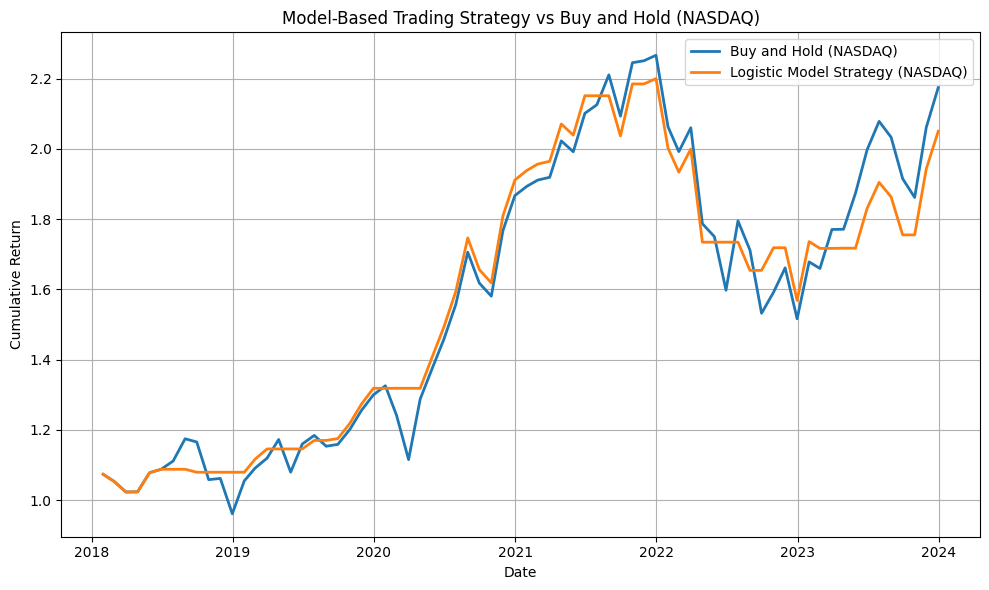


NASDAQ - Final Cumulative Return:
Buy and Hold: 2.17x
Model Strategy: 2.05x

NASDAQ - Annualized Return:
Buy and Hold: 13.82%
Model Strategy: 12.71%


In [20]:
returns_test_nasdaq = idx_pct.loc[X_test.index, 'NASDAQ']
assert len(returns_test_nasdaq) == len(y_test)

buy_and_hold_returns_nasdaq = returns_test_nasdaq.copy()
model_strategy_returns_nasdaq = returns_test_nasdaq.copy()
model_strategy_returns_nasdaq[y_pred_log_nasdaq == 0] = 0

buy_and_hold_cum_nasdaq = (1 + buy_and_hold_returns_nasdaq).cumprod()
model_cum_nasdaq = (1 + model_strategy_returns_nasdaq).cumprod()

plt.figure(figsize=(10,6))
plt.plot(buy_and_hold_cum_nasdaq, label='Buy and Hold (NASDAQ)', linewidth=2)
plt.plot(model_cum_nasdaq, label='Logistic Model Strategy (NASDAQ)', linewidth=2)
plt.title('Model-Based Trading Strategy vs Buy and Hold (NASDAQ)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("\nNASDAQ - Final Cumulative Return:")
print(f"Buy and Hold: {buy_and_hold_cum_nasdaq.iloc[-1]:.2f}x")
print(f"Model Strategy: {model_cum_nasdaq.iloc[-1]:.2f}x")

print("\nNASDAQ - Annualized Return:")
n_years_nasdaq = (len(buy_and_hold_returns_nasdaq) / 12)
print(f"Buy and Hold: {((buy_and_hold_cum_nasdaq.iloc[-1])**(1/n_years_nasdaq) - 1)*100:.2f}%")
print(f"Model Strategy: {((model_cum_nasdaq.iloc[-1])**(1/n_years_nasdaq) - 1)*100:.2f}%")
